In [44]:
import xarray as xr
import matplotlib.pyplot as plt

In [45]:
ds1 = xr.open_dataset('../L3-L5_files/2023.3/elev_bands/W5E5/RGI62/b_080/L5/summary/historical_run_output_11.nc')

In [46]:
ds2 = xr.open_dataset('../L3-L5_files/2025.1/elev_bands/W5E5_utm/RGI62/b_080/L5/summary/historical_run_output_11.nc')

In [47]:
ds3 = xr.open_dataset('../L3-L5_files/2025.1/elev_bands/W5E5_utm_dx50/RGI62/b_080/L5/summary/historical_run_output_11.nc')

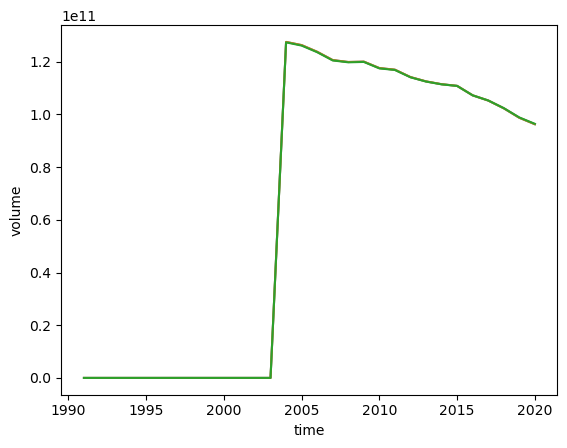

In [48]:
ds1.volume.sum(dim='rgi_id').plot();
ds2.volume.sum(dim='rgi_id').plot();
ds3.volume.sum(dim='rgi_id').plot();

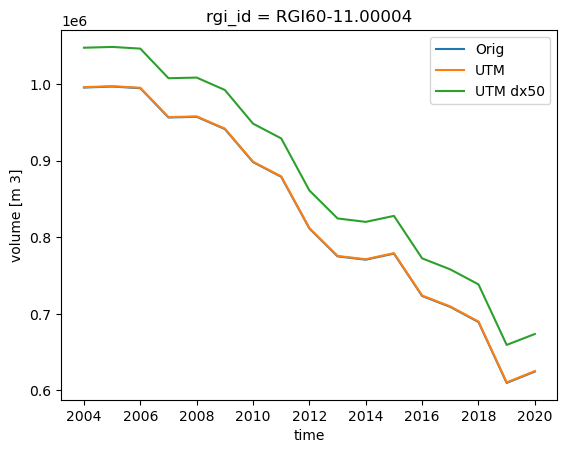

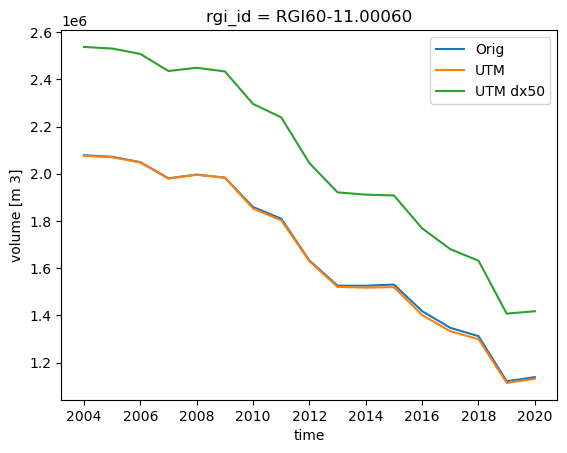

In [49]:
for i in [1, 3, 18, 59]:
    plt.figure()
    ds1.volume.isel(rgi_id=i).plot(label='Orig');
    ds2.volume.isel(rgi_id=i).plot(label='UTM');
    ds3.volume.isel(rgi_id=i).plot(label='UTM dx50');
    plt.legend();

In [50]:
common_running = (~ds1.volume.isel(time=-1).isnull()) & (~ds2.volume.isel(time=-1).isnull()) & (~ds3.volume.isel(time=-1).isnull())

In [51]:
common_running.sum().item(), len(common_running), (~ds3.volume.isel(time=-1).isnull()).sum().item()

(3064, 3927, 3065)

In [52]:
ds1 = ds1.isel(rgi_id=common_running.values)
ds2 = ds2.isel(rgi_id=common_running.values)
ds3 = ds3.isel(rgi_id=common_running.values)

In [55]:
v1 = ds1.volume.sum(dim='rgi_id').sel(time=slice('2004', None))
v2 = ds2.volume.sum(dim='rgi_id').sel(time=slice('2004', None))
v3 = ds3.volume.sum(dim='rgi_id').sel(time=slice('2004', None))

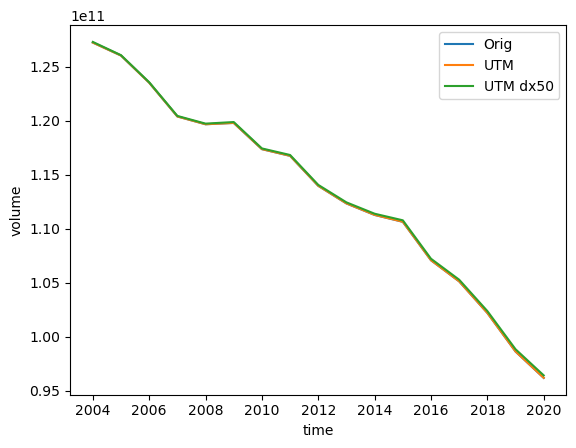

In [56]:
v1.plot(label='Orig');
v2.plot(label='UTM');
v3.plot(label='UTM dx50');
plt.legend();

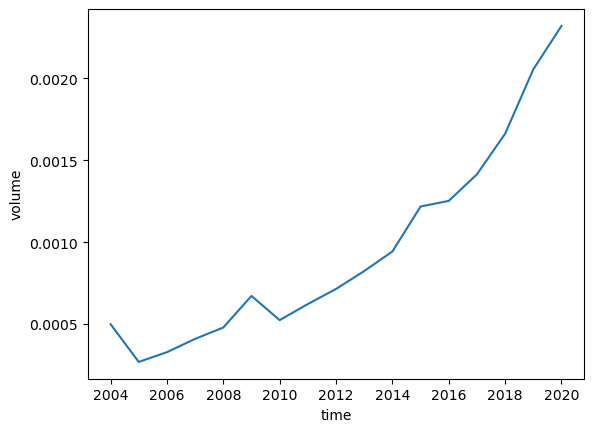

In [58]:
((v3 - v2)/v2).plot();

## 

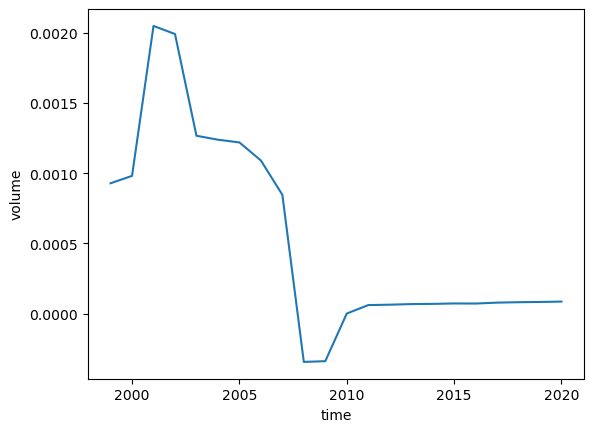

In [11]:
((ds2.volume.sum(dim='rgi_id') - ds1.volume.sum(dim='rgi_id')) / ds1.volume.sum(dim='rgi_id')).plot();